In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from matplotlib.rcsetup import validate_aspect
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/My Drive/SML/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/SML/test.csv')

data.describe()

In [ ]:
data.head(10)
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


**Explore Data set**

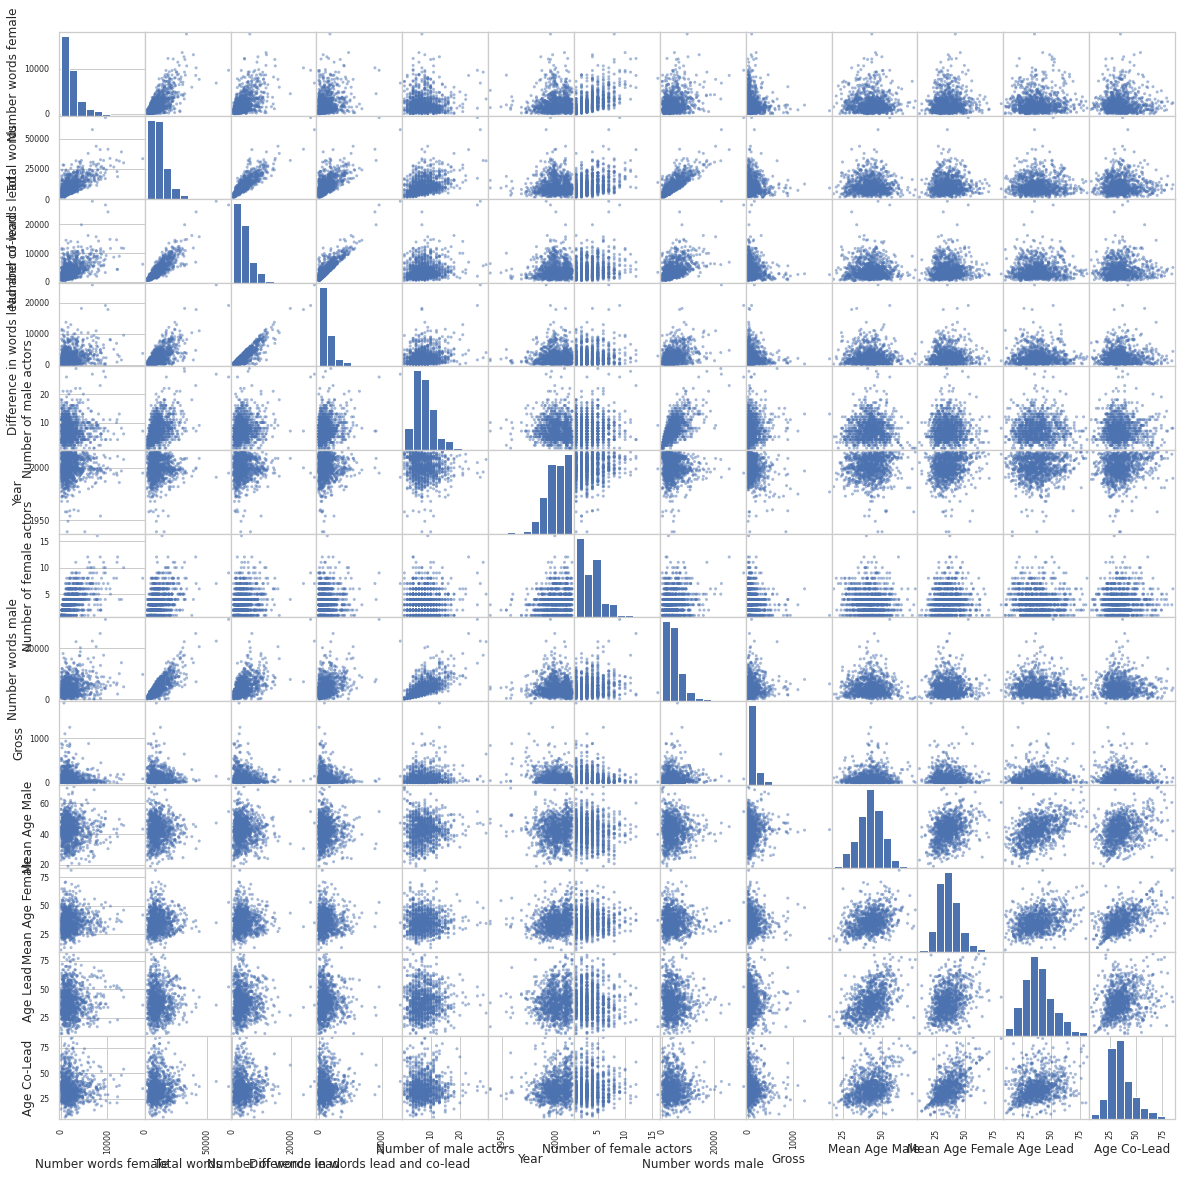

In [ ]:
pd.plotting.scatter_matrix(data.iloc[:, 0:14], figsize=(20,20))
plt.show()
# big outliers in a feature? 
# Yes, there might be some, but they are relevent. Example: Number words female is often 0. This information might be very valueable. 
# Meaning, we need a preprocessing methods, with accepts outliers but normalize the range of all features. 

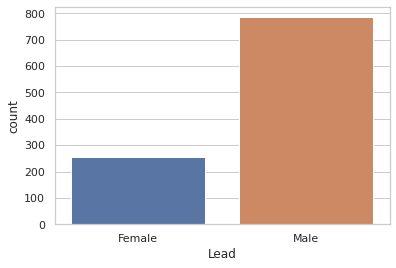

In [ ]:
sns.countplot(data['Lead'])

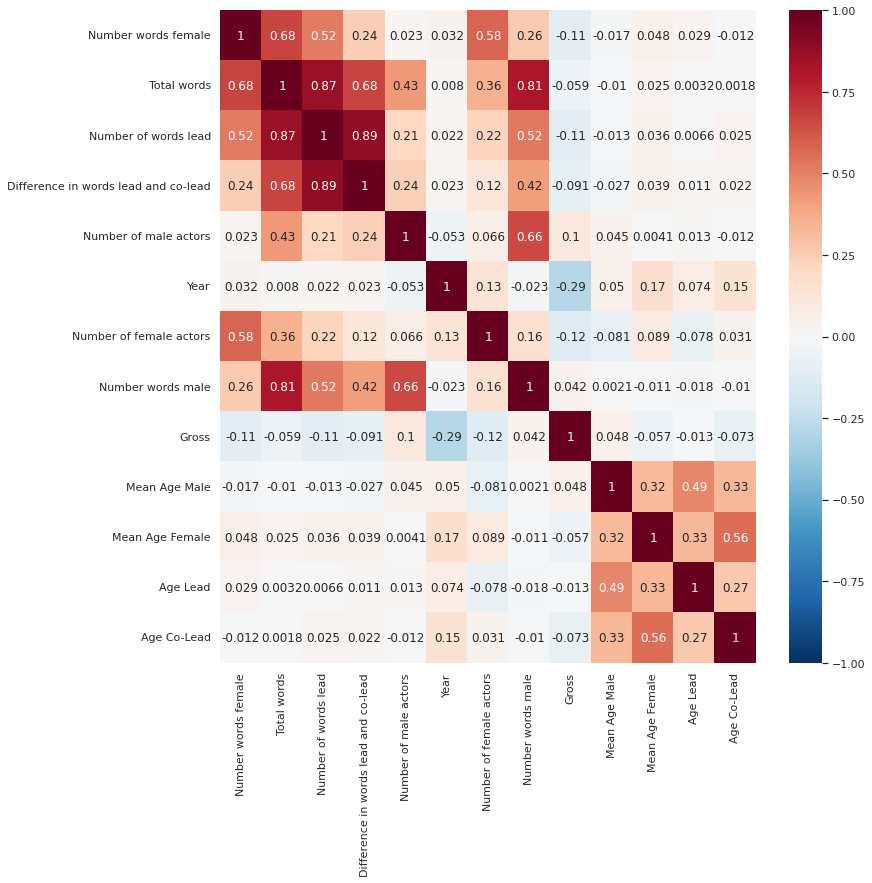

In [ ]:
# Correlation Heat map
corr = data.corr()
corr
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

**Data Preprocessing**

In [ ]:
######################################################################################################################################
################################################## Data preparation ################################################################
#######################################################################################################################################
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data.iloc[:, :5] = sc.fit_transform(X=data.iloc[:, :5])
# data.iloc[:, 6:8] = sc.fit_transform(X=data.iloc[:, 6:8])

# print(data.head(10))
# print(data.describe())

#STep 0 FEATURE SELECTION X and y
#X = data.drop(columns=['Lead','Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
#y = data['Lead']


### Convert target feature to catergorical number values (0 and 1)

In [ ]:
#### Convert LEAD from labels into [0,1]

data = pd.get_dummies(data,columns=['Lead'])
data = data.rename(columns={'Lead_Female':'Lead'})
data = data.drop(columns='Lead_Male')


### Convert target feature to catergorical number values (-1 and 1)

In [ ]:
# #### Convert Lead into -1 , 1
# data['Lead_bin'] = data['Lead'].apply({'Male': -1, 'Female':1}.get)

# data.head()

In [ ]:
#### Convert LEAD from labels into [0,1]
# data_test = pd.get_dummies(data_test,columns=['Lead'])
# data_test = data_test.rename(columns={'Lead_Female':'Lead'})
# data_test = data_test.drop(columns='Lead_Male')
# data_test.head()

## Splitting Data into train, test ; X, y

In [ ]:
# define dataset
X = data.drop(columns=['Lead','Gross','Total words'])
y = data['Lead']
np.random.seed(1)
X_train, X_val, y_train, y_val = skl_ms.train_test_split(X,y,train_size=0.75, random_state=1)

# **Logistic Regression**

## Data preprocession LogReg

In [ ]:
data = pd.read_csv('/content/drive/My Drive/SML/train.csv')
#### Convert LEAD from categorical to numberic [0,1]
data = pd.get_dummies(data,columns=['Lead'])
data = data.rename(columns={'Lead_Female':'Lead'})
data = data.drop(columns='Lead_Male')

In [ ]:
# define dataset
X = data.drop(columns=['Lead'])
y = data['Lead']
np.random.seed(1)
X_train, X_val, y_train, y_val = skl_ms.train_test_split(X,y,train_size=0.75, random_state=1)

## Hyperparameter tuning

In [ ]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
model = LogisticRegression()
solvers = ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight = [None, {1:2,0:1}]

#Convert to dictionary
hyperparameters =  dict(solver=solvers,penalty=penalty,C=c_values, class_weight=class_weight)

#Create new KNN object
model_logReg = skl_lm.LogisticRegression()
#Use GridSearch

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_logReg, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#Fit the model
grid_result = grid_search.fit(X_train,y_train)


#Print The value of best Hyperparameters
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.870385 using {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
0.868676 (0.032423) with: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
0.866117 (0.036385) with: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
0.799806 (0.044025) with: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
0.756943 (0.016660) with: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'sag'}
0.753108 (0.012973) with: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
0.831441 (0.038044) with: {'C': 100, 'class_weight': {1: 2, 0: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
0.831013 (0.040328) with: {'C': 100, 'class_weight': {1: 2, 0: 1}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.784826 (0.045628) with: {'C': 100, 'class_weight': {1: 2, 0: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.750566 (0.040467) with: {'C': 100, 'class_weight': {1: 2, 0: 1}, 'penalty': 'l2', 'solver': 'sag'}
0.75227

## **Feature Selection**

In [ ]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE

# define dataset
X = data.drop(columns=['Lead'])
y = data['Lead']

# feature extraction
model = LogisticRegression(solver='liblinear')
# model = skl_da.LinearDiscriminantAnalysis()
rfe = RFE(model)
rfe.fit(X,y)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)
data.head()

Num Features: 6
Selected Features: [False False False False  True False  True False False  True  True  True
  True]
Feature Ranking: [3 8 5 4 1 2 1 6 7 1 1 1 1]


,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,1
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,0
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,0
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,0
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,0


## **Logistic regression with cross validation**

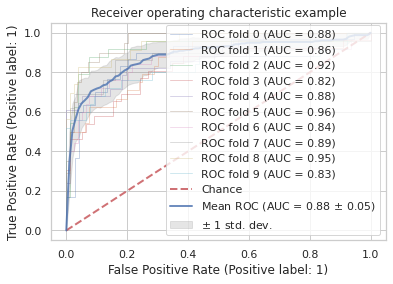


 ########### Metrics about Logistic Regression ##########
Missclassification Rate: 0.125121 
Accuracy: 0.875

False Positive (Female):  0.3779527559055118
False Negative (Male):  0.04331210191082802
F1 Score Female: 0.709
Precision Female: 0.823


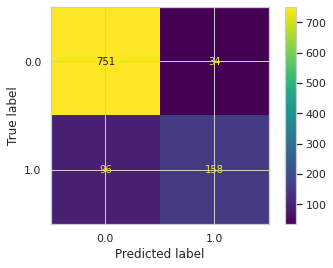

In [ ]:
######################################################################################################################################
################################################## Logistic regression with cross validation ################################################################
#######################################################################################################################################

# #############################################################################
# Classification and ROC analysis
n_folds = 10
cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
model_LogReg = skl_lm.LogisticRegression(solver='liblinear', C=1.0, penalty='l1' )

tprs = []
aucs = []
prediction_all = np.zeros(1)
val_all = np.zeros(1)
misclassification = []
val_all = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X)):
    model_LogReg.fit(X.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        model_LogReg,
        X.iloc[val],
        y.loc[val],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    prediction = model_LogReg.predict(X.iloc[val])
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    misclassification.append(np.mean(prediction != y.iloc[val]))
    prediction_all = np.concatenate((prediction_all, prediction))
    val_all = np.concatenate((val_all, y.iloc[val]))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

prediction_all = prediction_all[1:]
vall_all = val_all[1:]
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()
print('\n ########### Metrics about Logistic Regression ##########')
print('Missclassification Rate: %0.6f ' % np.mean(misclassification))
print('Accuracy: %.3f\n' % accuracy_score(val_all, prediction_all))

ConfusionMatrixDisplay.from_predictions(val_all , prediction_all)
false_positive_rate = (np.sum((prediction_all==0)&(val_all==1)))/(np.sum(val_all == 1))
false_negative_rate = (np.sum((prediction_all==1)&(val_all==0)))/(np.sum(val_all == 0))
print("False Positive (Female): ", false_positive_rate)
print("False Negative (Male): ", false_negative_rate)
print('F1 Score Female: %.3f' % f1_score(val_all, prediction_all))
print('Precision Female: %.3f' % precision_score(val_all, prediction_all))
# print('Recall Female: %.3f' % recall_score(val_all, prediction_all))


# **LDA**

Error rate [Validation Error] for LDA 0.11217948717948718
The class order in the model: 
[0 1]
Examples of predicted probabilities for the above classes
prediction: 
[1 1 0 0 0]
y_val: 
724     0
581     0
705     0
783     1
80      0
       ..
512     0
276     0
449     1
538     1
1010    0
Name: Lead, Length: 312, dtype: uint8
prediction_prob
[[0.44323422 0.55676578]
 [0.47854959 0.52145041]
 [0.93659667 0.06340333]
 [0.86883622 0.13116378]
 [0.79014576 0.20985424]]
Confusion matrix:

Lead     0   1
row_0         
0      232  22
1       13  45 

Accuracy: 0.888
0.3283582089552239
0.053061224489795916
F1 Score: 0.720
Precision: 0.776
Recall: 0.672
Accuracy: 0.888


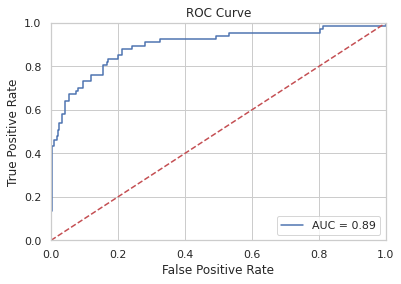

In [ ]:
np.random.seed(1)
X = data.drop(columns=['Lead','Gross','Total words'])
y = data['Lead']
X_train, X_val, y_train, y_val = skl_ms.train_test_split(X,y,train_size=0.7, random_state=1)
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction = model.predict(X_val)
err = np.mean(prediction != y_val)
print('Error rate [Validation Error] for LDA '+ str(err))
predict_prob = model.predict_proba(X_val)
print('The class order in the model: ')
print(model.classes_)
print('Examples of predicted probabilities for the above classes')
print('prediction: ')
print(prediction[0:5])
print('y_val: ')
print(y_val)
print('prediction_prob')
print(predict_prob[0:5])

print('Confusion matrix:\n')
print(pd.crosstab(prediction, y_val), '\n')
print(f"Accuracy: {np.mean(prediction == y_val):.3f}")
false_positive_rate = (np.sum((prediction==0)&(y_val==1)))/(np.sum(y_val == 1))
false_negative_rate = (np.sum((prediction==1)&(y_val==0)))/(np.sum(y_val == 0))
print(false_positive_rate)
print(false_negative_rate)

##ROC
print('F1 Score: %.3f' % f1_score(y_val, prediction))
print('Precision: %.3f' % precision_score(y_val, prediction))
print('Recall: %.3f' % recall_score(y_val, prediction))
print('Accuracy: %.3f' % accuracy_score(y_val, prediction))

fpr, tpr, threshold = roc_curve(y_val, predict_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

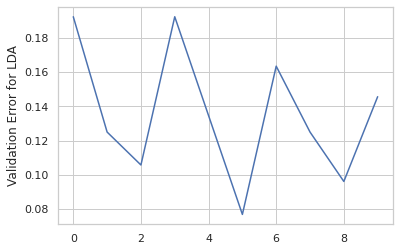

Error rate [Validation Error] for LDA 0.13571695294996267


In [ ]:
#Step1 cross validation
n_folds = 10

cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
misclassification = np.zeros(n_folds)
counter = 0

for train_index, val_index in cv.split(X):
  
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  # Train model for every n_folds
  model = skl_da.LinearDiscriminantAnalysis()
  model.fit(X_train, y_train)
  prediction = model.predict(X_val)
  misclassification[counter] = np.mean(prediction != y_val)
  counter = counter + 1


plt.plot(misclassification)
plt.ylabel('Validation Error for LDA')
plt.show()
misclassification_mean = np.mean(misclassification)
print('Error rate [Validation Error] for LDA '+ str(misclassification_mean))

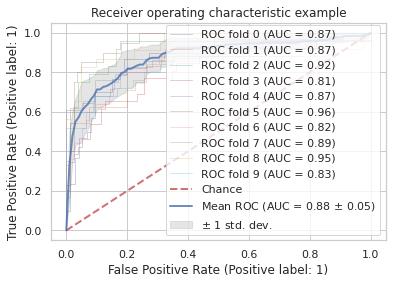


 ########### Metrics about Logistic Regression ##########
Missclassification Rate: 0.135717 
Accuracy: 0.864

False Positive (Female):  0.41338582677165353
False Negative (Male):  0.045859872611464965
F1 Score Female: 0.679
Precision Female: 0.805


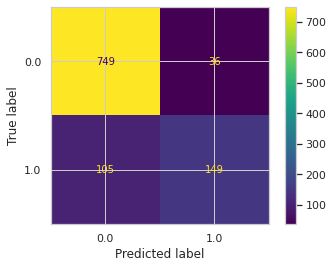

In [ ]:
from matplotlib.rcsetup import validate_aspect
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves
n_folds = 10
cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
model_lda = skl_da.LinearDiscriminantAnalysis()

tprs = []
aucs = []
prediction_all = np.zeros(1)
val_all = np.zeros(1)
misclassification = []
val_all = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X)):
    model_lda.fit(X.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        model_lda,
        X.iloc[val],
        y.loc[val],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    prediction = model_lda.predict(X.iloc[val])
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    misclassification.append(np.mean(prediction != y.iloc[val]))
    prediction_all = np.concatenate((prediction_all, prediction))
    val_all = np.concatenate((val_all, y.iloc[val]))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

prediction_all = prediction_all[1:]
vall_all = val_all[1:]
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()
print('\n ########### Metrics about Logistic Regression ##########')
print('Missclassification Rate: %0.6f ' % np.mean(misclassification))
print('Accuracy: %.3f\n' % accuracy_score(val_all, prediction_all))

ConfusionMatrixDisplay.from_predictions(val_all , prediction_all)
false_positive_rate = (np.sum((prediction_all==0)&(val_all==1)))/(np.sum(val_all == 1))
false_negative_rate = (np.sum((prediction_all==1)&(val_all==0)))/(np.sum(val_all == 0))
print("False Positive (Female): ", false_positive_rate)
print("False Negative (Male): ", false_negative_rate)
print('F1 Score Female: %.3f' % f1_score(val_all, prediction_all))
print('Precision Female: %.3f' % precision_score(val_all, prediction_all))
# print('Recall Female: %.3f' % recall_score(val_all, prediction_all))


# **QDA**

## Data preprocession LogReg

In [ ]:
data = pd.read_csv('/content/drive/My Drive/SML/train.csv')
#### Convert LEAD from categorical to numberic [0,1]
data = pd.get_dummies(data,columns=['Lead'])
data = data.rename(columns={'Lead_Female':'Lead'})
data = data.drop(columns='Lead_Male')

In [ ]:
# define dataset
X = data.drop(columns=['Lead'])
y = data['Lead']
np.random.seed(1)
X_train, X_val, y_train, y_val = skl_ms.train_test_split(X,y,train_size=0.75, random_state=1)

## **Hypertuning**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
model = skl_da.QuadraticDiscriminantAnalysis()

reg_param =[0,0.1, 0.2, 0.3, 0.4, 2,5]
#Convert to dictionary
hyperparameters =  dict(reg_param=reg_param)

#Create new model object
model_qda_hy = skl_da.QuadraticDiscriminantAnalysis()
#Use GridSearch

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_qda_hy, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#Fit the model
grid_result = grid_search.fit(X_train,y_train)


#Print The value of best Hyperparameters
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887529 using {'reg_param': 0.2}
0.856738 (0.052048) with: {'reg_param': 0}
0.887096 (0.032753) with: {'reg_param': 0.1}
0.887529 (0.033450) with: {'reg_param': 0.2}
0.885814 (0.033396) with: {'reg_param': 0.3}
0.881108 (0.035225) with: {'reg_param': 0.4}
0.745837 (0.004551) with: {'reg_param': 2}
0.745837 (0.004551) with: {'reg_param': 5}


Error rate when gross considered for QDA 0.12307692307692308
Confusion matrix:

Lead     0   1
row_0         
0      181  21
1       11  47 

Accuracy: 0.877
False Positive:  0.3088235294117647
False Negative:  0.057291666666666664
F1 Score: 0.746
Precision: 0.810
Recall: 0.691
Accuracy: 0.877
count    260.000000
mean       0.261538
std        0.440320
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Lead, dtype: float64


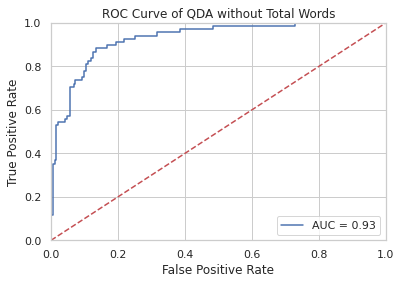

In [ ]:
np.random.seed(1)

# Normalizing the dataset
newdata = data.copy().drop(columns=['Lead','Total words', 'Gross'])#, 'Age Lead',  'Total words', 'Gross'  'Number of words lead''Number of words lead', 'Difference in words lead and co-lead' 'Mean Age Male', 'Mean Age Female'  'Number of male actors', 'Number of female actors'
newdata = skl_pre.normalize(newdata, axis = 0)#.iloc[:, 0:8]

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
leadcolumn = data['Lead']
normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

# Dividing the dataset into train and test
trainIndex = np.random.choice(normalized_data.shape[0], size = int(len(normalized_data)*.75), replace=False)
train = normalized_data.iloc[trainIndex]
test = normalized_data.iloc[~normalized_data.index.isin(trainIndex)]

X_train = train.copy().drop(columns=['Lead'])
y_train = train['Lead']
X_val = test.copy().drop(columns=['Lead'])
y_val = test['Lead']

#Step2 QDA
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction = model.predict(X_val)
predict_prob = model.predict_proba(X_val)
err = np.mean(prediction != y_val)
print('Error rate when gross considered for QDA '+ str(err))

print('Confusion matrix:\n')
print(pd.crosstab(prediction, y_val), '\n')
print(f"Accuracy: {np.mean(prediction == y_val):.3f}")
false_positive_rate = (np.sum((prediction==0)&(y_val==1)))/(np.sum(y_val == 1))
false_negative_rate = (np.sum((prediction==1)&(y_val==0)))/(np.sum(y_val == 0))
print("False Positive: ", false_positive_rate)
print("False Negative: ", false_negative_rate)

##ROC
print('F1 Score: %.3f' % f1_score(y_val, prediction))
print('Precision: %.3f' % precision_score(y_val, prediction))
print('Recall: %.3f' % recall_score(y_val, prediction))
print('Accuracy: %.3f' % accuracy_score(y_val, prediction))
print(y_val.describe())
fpr, tpr, threshold = roc_curve(y_val, predict_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of QDA without Total Words')
plt.show()

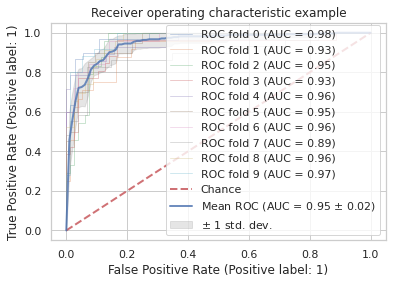


 ########### Metrics about Logistic Regression ##########
Missclassification Rate: 0.102950 
Accuracy: 0.897

False Positive (Female):  0.25196850393700787
False Negative (Male):  0.05477707006369427
F1 Score Female: 0.780
Precision Female: 0.815


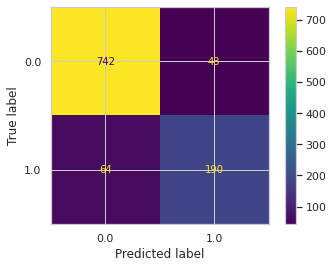

In [ ]:
from matplotlib.rcsetup import validate_aspect
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves
n_folds = 10
cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
model_qda = skl_da.QuadraticDiscriminantAnalysis()

tprs = []
aucs = []
prediction_all = np.zeros(1)
val_all = np.zeros(1)
misclassification = []
val_all = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X)):
    model_qda.fit(X.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        model_qda,
        X.iloc[val],
        y.loc[val],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    prediction = model_qda.predict(X.iloc[val])
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    misclassification.append(np.mean(prediction != y.iloc[val]))
    prediction_all = np.concatenate((prediction_all, prediction))
    val_all = np.concatenate((val_all, y.iloc[val]))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

prediction_all = prediction_all[1:]
vall_all = val_all[1:]
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()
print('\n ########### Metrics about Logistic Regression ##########')
print('Missclassification Rate: %0.6f ' % np.mean(misclassification))
print('Accuracy: %.3f\n' % accuracy_score(val_all, prediction_all))

ConfusionMatrixDisplay.from_predictions(val_all , prediction_all)
false_positive_rate = (np.sum((prediction_all==0)&(val_all==1)))/(np.sum(val_all == 1))
false_negative_rate = (np.sum((prediction_all==1)&(val_all==0)))/(np.sum(val_all == 0))
print("False Positive (Female): ", false_positive_rate)
print("False Negative (Male): ", false_negative_rate)
print('F1 Score Female: %.3f' % f1_score(val_all, prediction_all))
print('Precision Female: %.3f' % precision_score(val_all, prediction_all))
# print('Recall Female: %.3f' % recall_score(val_all, prediction_all))


1039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0.06730769 0.10576923 0.13461538 0.09615385 0.08653846 0.10576923
 0.09615385 0.15384615 0.11538462 0.06796117]


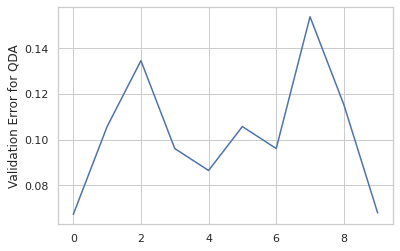

Error rate [Validation Error] for QDA 0.10294996265870053
The class order in the model: 
[0 1]
Examples of predicted probabilities for the above classes
[[0.91916168 0.08083832]
 [0.96831482 0.03168518]
 [0.98618482 0.01381518]
 [0.8961218  0.1038782 ]
 [0.82921302 0.17078698]]
['Female' 'Female' 'Female' 'Female' 'Female']
Confusion matrix:

col_0  0.0  1.0
row_0          
0.0    742   64
1.0     43  190 

Accuracy: 0.897


In [ ]:
###############################################################################################################################
############################################## Cross Validation for QDA #######################################################
###############################################################################################################################
#STep 0 FEATURE SELECTION X and y
#np.random.seed(1)

# Normalizing the dataset
newdata = data.copy().drop(columns=['Lead', 'Total words', 'Gross'])#, 'Age Lead',  'Total words', 'Gross'  'Number of words lead''Number of words lead', 'Difference in words lead and co-lead' 'Mean Age Male', 'Mean Age Female'  'Number of male actors', 'Number of female actors'

newdata = skl_pre.normalize(newdata, axis = 0) # .iloc[:, 0:8]

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])

# leadcolumn = data['Lead']
# normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

#X = normalized_data#.drop(columns=['Lead'])
X = data.drop(columns=['Lead', 'Gross', 'Total words'])
y = data['Lead']



n_folds = 10

cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
misclassification = np.zeros(n_folds)
prediction_all = np.zeros(1)
y_val_all =  np.zeros(1)
counter = 0
for train_index, val_index in cv.split(X):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  y_val_all = np.concatenate((y_val_all, y_val))
  # Train model for every n_folds
  model_LogReg = skl_da.QuadraticDiscriminantAnalysis()
  model_LogReg.fit(X_train, y_train)
  prediction = model_LogReg.predict(X_val)
  prediction_all = np.concatenate((prediction_all, prediction))
  misclassification[counter] = np.mean(prediction != y_val)
  counter = counter + 1
  

prediction_all = prediction_all[1:]
y_val_all = y_val_all[1:]
print(len(prediction_all))
print(prediction_all[:20])
print(misclassification)
plt.plot(misclassification)
plt.ylabel('Validation Error for QDA')
plt.show()
misclassification_mean = np.mean(misclassification)
print('Error rate [Validation Error] for QDA '+ str(misclassification_mean))

#Confussion matrix
predict_prob = model_LogReg.predict_proba(X_val)
print('The class order in the model: ')
print(model_LogReg.classes_)
print('Examples of predicted probabilities for the above classes')
print(predict_prob[0:5])

prediction = np.empty(len(X_val), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female','Male')
print(prediction[0:5])

print('Confusion matrix:\n')
print(pd.crosstab(prediction_all, y_val_all), '\n')
print(f"Accuracy: {np.mean(prediction_all == y_val_all):.3f}")

In [ ]:
normalized_data.describe()
normalized_data.head()
# data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.014761,0.013760,0.002996,0.007139,0.030948,0.038006,0.014322,0.037097,0.035468,0.035135,0.053813
1,0.014879,0.012348,0.010648,0.032126,0.031041,0.030404,0.028502,0.028183,0.024577,0.044301,0.028148
2,0.001513,0.005758,0.006875,0.024987,0.030529,0.007601,0.016761,0.030614,0.031000,0.035135,0.030632
3,0.010476,0.021028,0.022913,0.042835,0.031056,0.015202,0.029079,0.025372,0.018013,0.025206,0.019041
4,0.012858,0.023443,0.027507,0.028557,0.030839,0.030404,0.013805,0.032595,0.037703,0.027497,0.032288


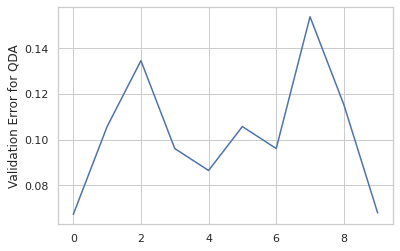

Error rate [Validation Error] for QDA 0.10294996265870053


In [ ]:
#Step1 cross validation
n_folds = 10

cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
misclassification = np.zeros(n_folds)
counter = 0
for train_index, val_index in cv.split(X):
  
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  # Train model for every n_folds
  model = skl_da.QuadraticDiscriminantAnalysis()
  model.fit(X_train, y_train)
  prediction = model.predict(X_val)
  misclassification[counter] = np.mean(prediction != y_val)
  counter = counter + 1


plt.plot(misclassification)
plt.ylabel('Validation Error for QDA')
plt.show()
misclassification_mean = np.mean(misclassification)
print('Error rate [Validation Error] for QDA '+ str(misclassification_mean))

# **KNN Model**


### Normalizing

In [ ]:
###############################################################################################################
#################################  NORMALIZING FOR KNN   ###########################################################

np.random.seed(1)
# Normalizing the dataset
newdata = data.copy().drop(columns=['Lead','Total words', 'Gross'])
# pd.get_dummies(newdata, columns=['Lead'])
newdata = skl_pre.normalize(newdata.iloc[:, 0:8], axis = 0)

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
leadcolumn = data['Lead']
normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

# Dividing the dataset into train and test
trainIndex = np.random.choice(normalized_data.shape[0], size = int(len(normalized_data)*.75), replace=False)
train = normalized_data.iloc[trainIndex]
test = normalized_data.iloc[~normalized_data.index.isin(trainIndex)]

### Hyperparameter tuning

In [ ]:
############################################################################
###################################K-NN Classifier##########################
############################################################################

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])




Best leaf_size: 1
Best p: 2
Best n_neighbors: 5


### KNN Model

In [ ]:
model_knn = skl_nb.KNeighborsClassifier(n_neighbors=5,leaf_size=1, p=2)
model_knn.fit(X_train,y_train)
prediction = model_knn.predict(X_val)

predict_prob = model_knn.predict_proba(X_val)
err = np.mean(prediction != y_val)
print('Error rate when gross considered for KNN '+ str(err))

print('Confusion matrix:\n')
print(pd.crosstab(prediction, y_val), '\n')
print(f"Accuracy: {np.mean(prediction == y_val):.3f}")
false_positive_rate = (np.sum((prediction==0)&(y_val==1)))/(np.sum(y_val == 1))
false_negative_rate = (np.sum((prediction==1)&(y_val==0)))/(np.sum(y_val == 0))
print("False Positive: ", false_positive_rate)
print("False Negative: ", false_negative_rate)



Error rate when gross considered for KNN 0.17475728155339806
Confusion matrix:

Lead    0   1
row_0        
0      74  14
1       4  11 

Accuracy: 0.825
False Positive:  0.56
False Negative:  0.05128205128205128


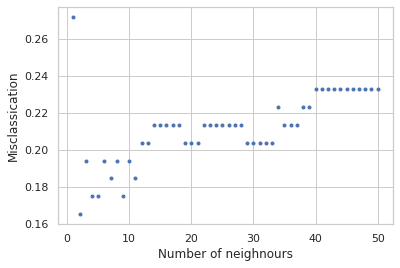

In [ ]:
misclassification = []
for k in range(50):
  model_knn = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
  model_knn.fit(X_train,y_train)
  prediction = model_knn.predict(X_val)
  misclassification.append(np.mean(prediction != y_val))

K = np.linspace(1,50,50)
plt.plot(K, misclassification, '.')
plt.ylabel('Misclassication')
plt.xlabel('Number of neighnours')
plt.show()

###Cross Validation

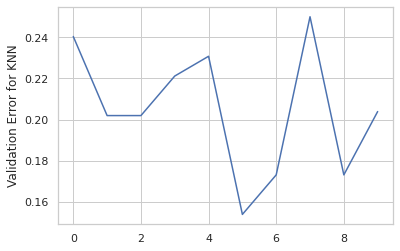

Error rate [Validation Error] for KNN 0.2050037341299477
The class order in the model: 
[0 1]
Examples of predicted probabilities for the above classes
[[0.91666667 0.08333333]
 [0.83333333 0.16666667]
 [1.         0.        ]
 [0.83333333 0.16666667]
 [0.66666667 0.33333333]]
['Female' 'Female' 'Female' 'Female' 'Female']
Confusion matrix:

col_0  0.0  1.0
row_0          
0.0    781  209
1.0      4   45 

Accuracy: 0.795


In [ ]:
################Cross-validation for Knn######################################
n_folds = 10

cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
misclassification = np.zeros(n_folds)
prediction_all = np.zeros(1)
counter = 0
y_val_all =  np.zeros(1)
for train_index, val_index in cv.split(X):
  
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  y_val_all = np.concatenate((y_val_all, y_val))

  # Train model for every n_folds
  model_knnCross = skl_nb.KNeighborsClassifier(n_neighbors=12,leaf_size=1, p=2)
  model_knnCross.fit(X_train, y_train)
  prediction = model_knnCross.predict(X_val)
  
  prediction_all = np.concatenate((prediction_all, prediction))
  misclassification[counter] = np.mean(prediction != y_val)
  counter = counter + 1

prediction_all = prediction_all[1:]
y_val_all = y_val_all[1:]
plt.plot(misclassification)
plt.ylabel('Validation Error for KNN')
plt.show()
misclassification_mean = np.mean(misclassification)
print('Error rate [Validation Error] for KNN '+ str(misclassification_mean))

#Confussion matrix
predict_prob = model_knnCross.predict_proba(X_val)
print('The class order in the model: ')
print(model_knnCross.classes_)
print('Examples of predicted probabilities for the above classes')
print(predict_prob[0:5])

prediction = np.empty(len(X_val), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female','Male')
print(prediction[0:5])

print('Confusion matrix:\n')
print(pd.crosstab(prediction_all, y_val_all), '\n')
print(f"Accuracy: {np.mean(prediction_all == y_val_all):.3f}")

###Error rate, Confusion Matrix, Accuracy, ROC

Test error rate is:  0.17475728155339806
The class order in the model: 
[0 1]
Examples of predicted probabilities for the above classes
[[0.91666667 0.08333333]
 [0.83333333 0.16666667]
 [1.         0.        ]
 [0.83333333 0.16666667]
 [0.66666667 0.33333333]]
['Female' 'Female' 'Female' 'Female' 'Female']
Confusion matrix:

col_0  0.0  1.0
row_0          
0.0    781  209
1.0      4   45 

Accuracy: 0.795
F1 Score: 0.550
Precision: 0.733
Recall: 0.440
Accuracy: 0.825


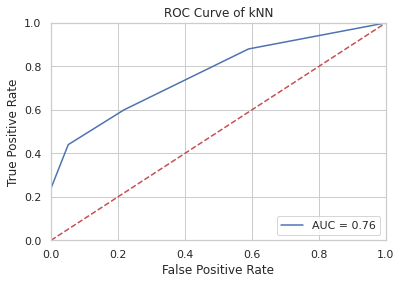

In [ ]:
# Defining the x and y axis of test and train
knn_model = skl_nb.KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X=X_train, y=y_train)
y_predict = knn_model.predict(X_val)
print("Test error rate is: ", np.mean(y_predict != y_val))

# Confusion Matrix
pd.crosstab(y_predict, y_val)
#Confussion matrix
predict_prob = model_knnCross.predict_proba(X_val)
print('The class order in the model: ')
print(model_knnCross.classes_)
print('Examples of predicted probabilities for the above classes')
print(predict_prob[0:5])

prediction = np.empty(len(X_val), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female','Male')
print(prediction[0:5])

print('Confusion matrix:\n')
print(pd.crosstab(prediction_all, y_val_all), '\n')
print(f"Accuracy: {np.mean(prediction_all == y_val_all):.3f}")

print('F1 Score: %.3f' % f1_score(y_val, y_predict))
print('Precision: %.3f' % precision_score(y_val, y_predict))
print('Recall: %.3f' % recall_score(y_val, y_predict))
print('Accuracy: %.3f' % accuracy_score(y_val, y_predict))

y_scores = knn_model.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


# Random Forest

In [ ]:
######################################################################################################################################
################################################## Random Forest #####################################################################
######################################################################################################################################

np.random.seed(1)

# Normalizing the dataset
newdata = data.copy().drop(columns=['Gross','Total words'])
# pd.get_dummies(newdata, columns=['Lead'])
newdata = skl_pre.normalize(newdata.iloc[:, 0:8], axis = 0)

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
leadcolumn = data['Lead']
normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

# Dividing the dataset into train and test
trainIndex = np.random.choice(normalized_data.shape[0], size = int(len(normalized_data)*.75), replace=False)
train = normalized_data.iloc[trainIndex]
test = normalized_data.iloc[~normalized_data.index.isin(trainIndex)]
# print(train.head())
# print(test.head())
# print(train.describe())
# print(test.describe())

In [ ]:
# Defining the x and y axis of test and train
x_train = train.copy().drop(columns=['Lead'])
y_train = train['Lead']
x_test = test.copy().drop(columns=['Lead'])
y_test = test['Lead']

# model = tree.DecisionTreeClassifier(max_leaf_nodes=5)
model_randomforest = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=7)
model_randomforest.fit(X=x_train, y=y_train)
y_predict = model_randomforest.predict(x_test)
print("Test error rate is: ", np.mean(y_predict != y_test))

# Confusion Matrix
pd.crosstab(y_predict, y_test)

print('F1 Score: %.3f' % f1_score(y_test, y_predict))
print('Precision: %.3f' % precision_score(y_test, y_predict))
print('Recall: %.3f' % recall_score(y_test, y_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

y_scores = model_randomforest.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

AttributeError: ignored

In [ ]:
# Bagging
baggingmodel = BaggingClassifier()
baggingmodel.fit(x_train, y_train)
error = np.mean(baggingmodel.predict(x_test) != y_test)
print(error)

0.17307692307692307


# **AdaBoost**

## Normalizing and diving the data

In [ ]:
np.random.seed(1)
# Normalizing the dataset
newdata = data.copy().drop(columns=['Lead','Total words', 'Gross'])
# pd.get_dummies(newdata, columns=['Lead'])
newdata = skl_pre.normalize(newdata.iloc[:, 0:8], axis = 0)

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
leadcolumn = data['Lead']
normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

# Dividing the dataset into train and test
trainIndex = np.random.choice(normalized_data.shape[0], size = int(len(normalized_data)*.75), replace=False)
train = normalized_data.iloc[trainIndex]
test = normalized_data.iloc[~normalized_data.index.isin(trainIndex)]

## Hyperparameter Tuning

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier()
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847708 using {'learning_rate': 0.1, 'n_estimators': 500}
0.743284 (0.032246) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.743284 (0.032246) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.743284 (0.032246) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.750549 (0.025637) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.744994 (0.031180) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.750549 (0.025637) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.752259 (0.025757) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.746265 (0.004908) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.760390 (0.012702) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.748829 (0.006055) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.746692 (0.005205) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.774958 (0.018873) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.757826 (0.013236) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.777950

## Training the model

Test error = 
0.11923076923076924
F1 Score: 0.705
Precision: 0.755
Recall: 0.661
Accuracy: 0.881


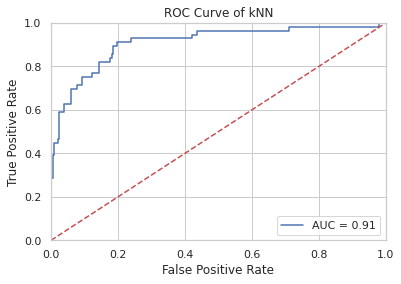

In [ ]:
#data['lead'] = data['lead'].apply({-1:'Male', 1:'Female'}.get)


model = AdaBoostClassifier(n_estimators= 500, learning_rate=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Test error = ")
print(np.mean(y_pred != y_val))

# Confusion Matrix
pd.crosstab(y_pred, y_val)

print('F1 Score: %.3f' % f1_score(y_val, y_pred))
print('Precision: %.3f' % precision_score(y_val, y_pred))
print('Recall: %.3f' % recall_score(y_val, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_val, y_pred))

y_scores = model.predict_proba(X_val)
fpr, tpr, threshold = roc_curve(y_val, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Cross Validation

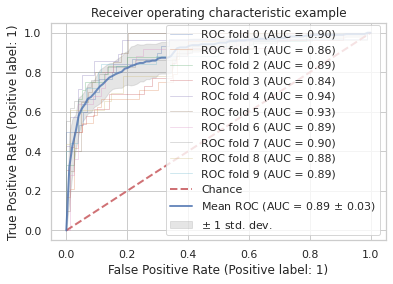


 ########### Metrics about AdaBoost ##########
Missclassification Rate: 0.137621 
Accuracy: 0.862

False Positive (Female):  0.3346456692913386
False Negative (Male):  0.07388535031847134
F1 Score Female: 0.703
Precision Female: 0.744


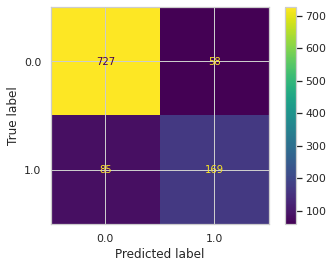

In [ ]:
from matplotlib.rcsetup import validate_aspect
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves
n_folds = 10
cv = skl_ms.KFold(n_splits=n_folds, random_state=2, shuffle=True)
model_adaCross = AdaBoostClassifier(n_estimators= 500, learning_rate=1.0)

tprs = []
aucs = []
prediction_all = np.zeros(1)
val_all = np.zeros(1)
misclassification = []
val_all = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X)):
    model_adaCross.fit(X.iloc[train], y.iloc[train])
    viz = RocCurveDisplay.from_estimator(
        model_adaCross,
        X.iloc[val],
        y.loc[val],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    prediction = model_adaCross.predict(X.iloc[val])
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    misclassification.append(np.mean(prediction != y.iloc[val]))
    prediction_all = np.concatenate((prediction_all, prediction))
    val_all = np.concatenate((val_all, y.iloc[val]))

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

prediction_all = prediction_all[1:]
vall_all = val_all[1:]
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()
print('\n ########### Metrics about AdaBoost ##########')
print('Missclassification Rate: %0.6f ' % np.mean(misclassification))
print('Accuracy: %.3f\n' % accuracy_score(val_all, prediction_all))

ConfusionMatrixDisplay.from_predictions(val_all , prediction_all)
false_positive_rate = (np.sum((prediction_all==0)&(val_all==1)))/(np.sum(val_all == 1))
false_negative_rate = (np.sum((prediction_all==1)&(val_all==0)))/(np.sum(val_all == 0))
print("False Positive (Female): ", false_positive_rate)
print("False Negative (Male): ", false_negative_rate)
print('F1 Score Female: %.3f' % f1_score(val_all, prediction_all))
print('Precision Female: %.3f' % precision_score(val_all, prediction_all))
# print('Recall Female: %.3f' % recall_score(val_all, prediction_all))


# **Model Selection**

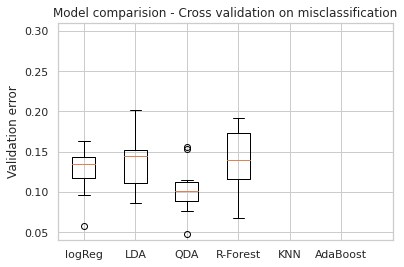

[[0.125      0.10576923 0.09615385 0.17307692]
 [0.09615385 0.10576923 0.11538462 0.06730769]
 [0.13461538 0.14423077 0.08653846 0.15384615]
 [0.11538462 0.125      0.07692308 0.10576923]
 [0.16346154 0.16346154 0.10576923 0.125     ]
 [0.15384615 0.20192308 0.15384615 0.19230769]
 [0.05769231 0.08653846 0.04807692 0.11538462]
 [0.13461538 0.14423077 0.09615385 0.17307692]
 [0.13461538 0.15384615 0.10576923 0.17307692]
 [0.14563107 0.14563107 0.15533981 0.11650485]]


In [ ]:
#STep 0 FEATURE SELECTION X and y
X = data.drop(columns=['Lead', 'Gross', 'Total words'])#'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'
y = data['Lead']

# # # Normalizing the dataset
# newdata = data.copy().drop(columns=['Lead', 'Gross', 'Total words'])
# # pd.get_dummies(newdata, columns=['Lead'])
# newdata = skl_pre.normalize(newdata.iloc[:, 0:8], axis = 0)

# normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
# leadcolumn = data['Lead']
# normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

# X =normalized_data.copy().drop(columns=['Lead'])
# y= data['Lead']
# # Dividing the dataset into train and test
# trainIndex = np.random.choice(normalized_data.shape[0], size = int(len(normalized_data)*.75), replace=False)
# X = normalized_data.iloc[trainIndex]
# y = normalized_data.iloc[~normalized_data.index.isin(trainIndex)]

n_fold = 10

models=[]
models.append(skl_lm.LogisticRegression(solver='liblinear',C=1, penalty='l2'))
models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis(reg_param= 0.1))
# models.append(skl_nb.KNeighborsClassifier(n_neighbors=12,leaf_size=1, p=2))
models.append(RandomForestClassifier(n_estimators=200, max_depth=10, max_features=7))#,oob_score=True 
# models.append(AdaBoostClassifier())

cv = skl_ms.KFold(n_splits=n_fold, random_state=1, shuffle=True)
misclassification = np.zeros((n_fold, len(models)))

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  for m in range(np.shape(models)[0]):
    model = models[m]
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    misclassification[i,m] = np.mean(prediction != y_val)

plt.ylim(0.04, 0.31)
plt.boxplot(misclassification)
plt.title('Model comparision - Cross validation on misclassification')
plt.xticks(np.arange(7)+1, ('logReg','LDA','QDA','R-Forest', 'KNN', 'AdaBoost'))
plt.ylabel('Validation error')
plt.show()
print(misclassification)

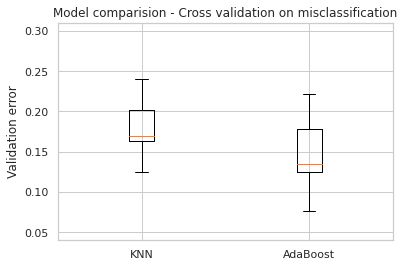

[[0.14423077 0.19230769]
 [0.125      0.13461538]
 [0.17307692 0.13461538]
 [0.16346154 0.125     ]
 [0.24038462 0.22115385]
 [0.21153846 0.19230769]
 [0.16346154 0.07692308]
 [0.17307692 0.125     ]
 [0.21153846 0.13461538]
 [0.16504854 0.0776699 ]]


In [ ]:
#STep 0 FEATURE SELECTION X and y
# X = data.drop(columns=['Lead', 'Gross', 'Total words'])#'Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'
# y = data['Lead']

# # Normalizing the dataset
newdata = data.copy().drop(columns=['Lead', 'Gross', 'Total words'])

newdata = skl_pre.normalize(newdata.iloc[:, 0:8], axis = 0)

normalized_data = pd.DataFrame(newdata) # columns=data.columns.drop(['Gross', 'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead'])
leadcolumn = data['Lead']
normalized_data = pd.concat([normalized_data, leadcolumn], axis=1)

X =normalized_data.copy().drop(columns=['Lead'])
y= data['Lead']


n_fold = 10

models=[]
# models.append(skl_lm.LogisticRegression(solver='liblinear'))
# models.append(skl_da.LinearDiscriminantAnalysis())
# models.append(skl_da.QuadraticDiscriminantAnalysis())
models.append(skl_nb.KNeighborsClassifier(n_neighbors=12,leaf_size=1, p=2))
# models.append(RandomForestClassifier(max_leaf_nodes=5, max_features='auto'))#,oob_score=True 
models.append(AdaBoostClassifier())

cv = skl_ms.KFold(n_splits=n_fold, random_state=1, shuffle=True)
misclassification = np.zeros((n_fold, len(models)))

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  for m in range(np.shape(models)[0]):
    model = models[m]
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    misclassification[i,m] = np.mean(prediction != y_val)

plt.ylim(0.04, 0.31)
plt.boxplot(misclassification)
plt.title('Model comparision - Cross validation on misclassification')
plt.xticks(np.arange(2)+1, ('KNN', 'AdaBoost'))
plt.ylabel('Validation error')
plt.show()
print(misclassification)

# plt.subplot(1, 2, 1) # row 1, col 2 index 1
# plt.boxplot(misclassification)
# plt.title('Model comparision - Cross validation on misclassification')
# plt.xticks(np.arange(4)+1, ('logReg','LDA','QDA','R-Forest'))
# plt.ylabel('Validation error')
# plt.figure(figsize=(200,200))
# plt.show()
# plt.subplot(1, 2, 2) # index 2
# plt.boxplot(misclassification)
# plt.title('Model comparision - Cross validation on misclassification')
# plt.xticks(np.arange(2)+1, ('KNN', 'AdaBoost'))
# plt.ylabel('Validation error')
# plt.figure(figsize=(200,200))

# plt.show()


In [ ]:
########          MODEL ON TEST data         ##########

X = data.copy().drop(columns=['Lead','Total words', 'Gross'])
y = data['Lead']
# DATA preprocessing
# Train model with whole train data
model = skl_da.QuadraticDiscriminantAnalysis(reg_param= 0.1)
model.fit(X, y)
# Prediction of female male
data_test = data_test.copy().drop(columns=['Total words', 'Gross'])
y_hat_prediction = model.predict(data_test);

# add new colum prediction
data_test['Lead_prediction'] = y_hat_prediction
# store it
data_test.to_csv('/content/drive/My Drive/SML/data_test_prediction_QDA.csv')